<a href="https://colab.research.google.com/github/ThomasMerle25/ADAD/blob/main/Rendu_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rendu 1 : 5 analyses avec le prénom "Alexis"

On utilise la base de données de l'INSEE des prénoms donnés en 2021.

* Analyse 1 (pour commencer) : Nombre de fois où le prénom "Alexis" masculin + féminin a été donné par année avec la moyenne entre 1981 et 2021

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.reset_orig()  # Reset in case previous cells were executed
sns.set()
color_palette = sns.color_palette()

prénom = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip", compression='zip', sep=";")

In [ ]:
display(prénom)


,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [ ]:
data = (prénom[(prénom["preusuel"] == "ALEXIS")]
                   .drop(["preusuel", "sexe"], axis=1)
                   .sort_values(by=['annais']))

data = data.groupby(data.annais).sum()

data = data.reset_index()

display(data)

,annais,nombre
0,1900,346
1,1901,383
2,1902,381
3,1903,424
4,1904,450
...,...,...
118,2018,854
119,2019,661
120,2020,631
121,2021,490


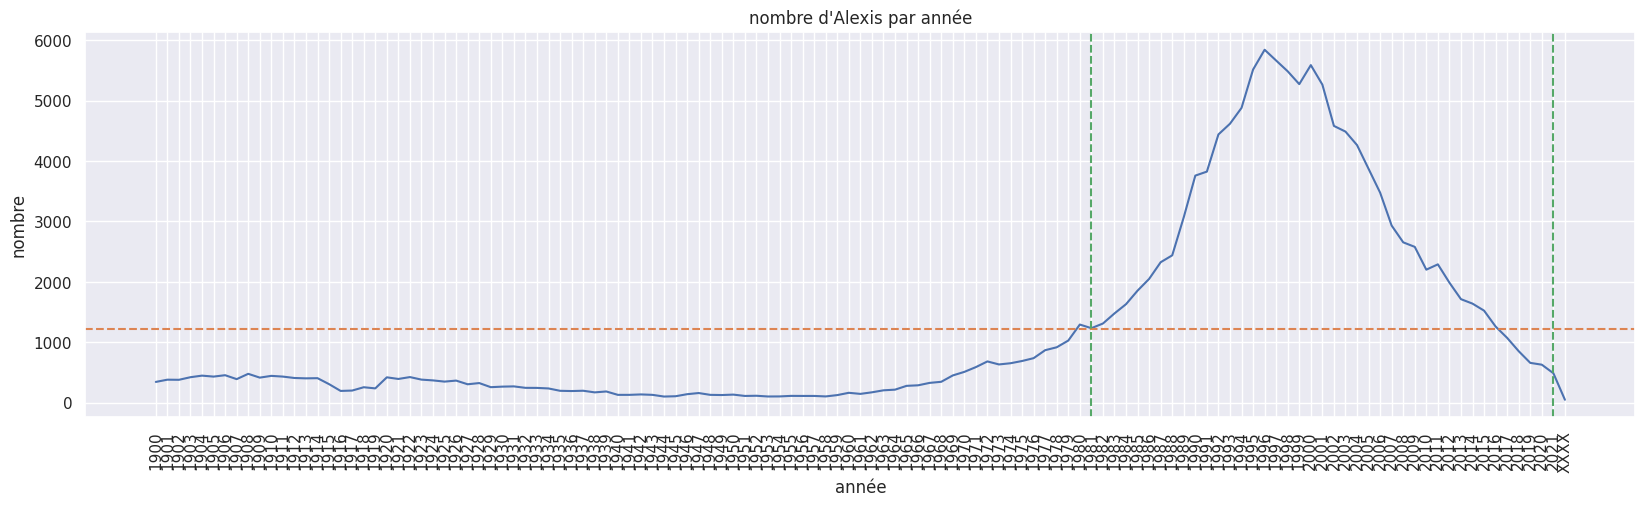

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(20, 5))

#  Add lines on the graph
chart = sns.lineplot(x=data.annais,
                     y=data.nombre,
                     color=color_palette[0],
                     ax=ax)

ax.axhline(data.nombre.mean(), ls='--', color=color_palette[1])
ax.axvline(x='1981', ls='--', color=color_palette[2])
ax.axvline(x='2021', ls='--', color=color_palette[2])


plt.xticks(rotation=90)
plt.title("nombre d'Alexis par année")
plt.xlabel('année')

plt.show()

* Analyse 2 : Comparaison avec les prenoms "Alex" et "Alexia", on va chercher à montrer l'évolution du prénom "Alexis", "Alex" et "Alexia" pour trouver une corrélation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.reset_orig()  # Reset in case previous cells were executed
sns.set()
color_palette = sns.color_palette()

prénom = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip",
                         compression='zip',
                         sep=";")

In [ ]:
# Function to get data for a specific prénom
def get_prénom_data(prénom_name):
    data = (prénom[(prénom["preusuel"] == prénom_name)]
                   .drop(["preusuel", "sexe"], axis=1)
                   .sort_values(by=['annais']))
    data = data.groupby(data.annais).sum()
    data = data.reset_index()
    data['annais'] = pd.to_numeric(data['annais'], errors='coerce')
    return data

In [ ]:
# Get data for Alexis, Alex, and Alexia
data_alexis = get_prénom_data("ALEXIS")
data_alex = get_prénom_data("ALEX")
data_alexia = get_prénom_data("ALEXIA")

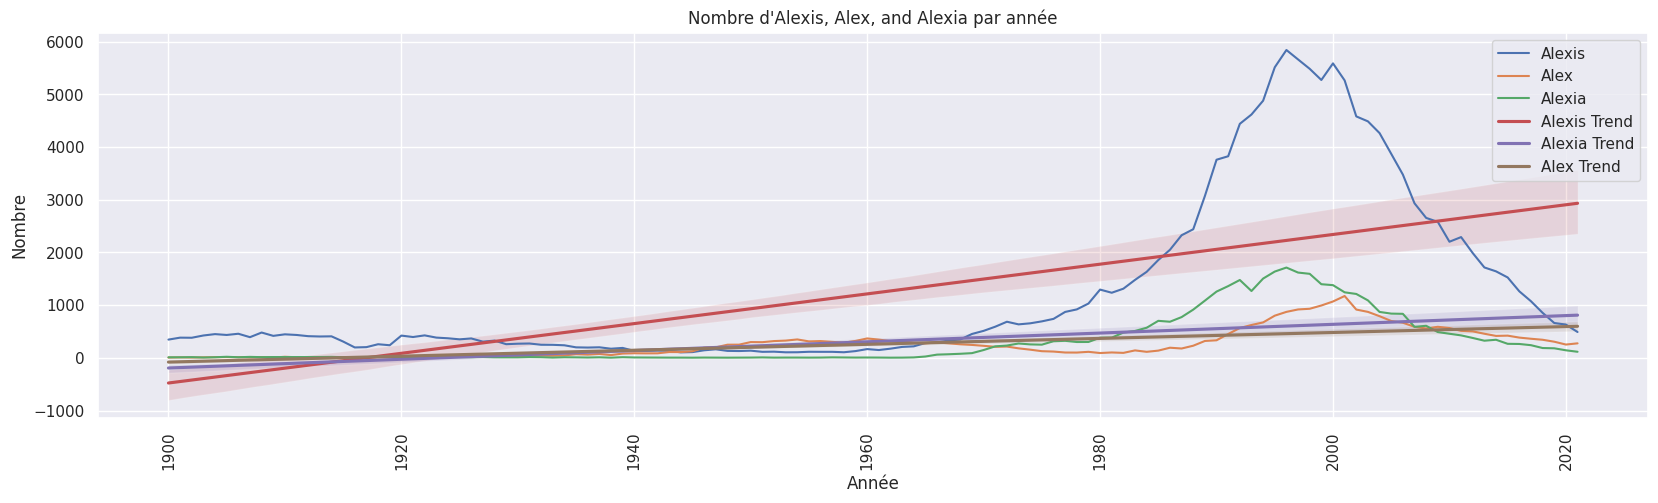

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(20, 5))

# Plot Alexis
sns.lineplot(x=data_alexis.annais, y=data_alexis.nombre,
             color=color_palette[0], label="Alexis", ax=ax)
# Plot Alex
sns.lineplot(x=data_alex.annais, y=data_alex.nombre,
             color=color_palette[1], label="Alex", ax=ax)
# Plot Alexia
sns.lineplot(x=data_alexia.annais, y=data_alexia.nombre,
             color=color_palette[2], label="Alexia", ax=ax)

# Add a trend line for Alexis
sns.regplot(x=data_alexis.annais, y=data_alexis.nombre, scatter=False,
            color=color_palette[3], ax=ax, label="Alexis Trend")

# Add a trend line for Alexia
sns.regplot(x=data_alexia.annais, y=data_alexia.nombre, scatter=False,
            color=color_palette[4], ax=ax, label="Alexia Trend")

# Add a trend line for Alex
sns.regplot(x=data_alex.annais, y=data_alex.nombre, scatter=False,
            color=color_palette[5], ax=ax, label="Alex Trend")


plt.xticks(rotation=90)
plt.title("Nombre d'Alexis, Alex, and Alexia par année")
plt.xlabel('Année')
plt.ylabel('Nombre')
plt.legend()

plt.show()

* Analyse 3 : Montrer l'évolution du prénom "Alexis" au cours du temps selon le sexe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.reset_orig()  # Reset in case previous cells were executed
sns.set()
color_palette = sns.color_palette()

prénom = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip",
                         compression='zip',
                         sep=";")

In [ ]:
# Filter data for "Alexis"
alexis_data = prénom[prénom["preusuel"] == "ALEXIS"]

# Group by year and sex, and sum occurrences
alexis_by_year_sex = alexis_data.groupby(["annais", "sexe"])["nombre"].sum().reset_index()

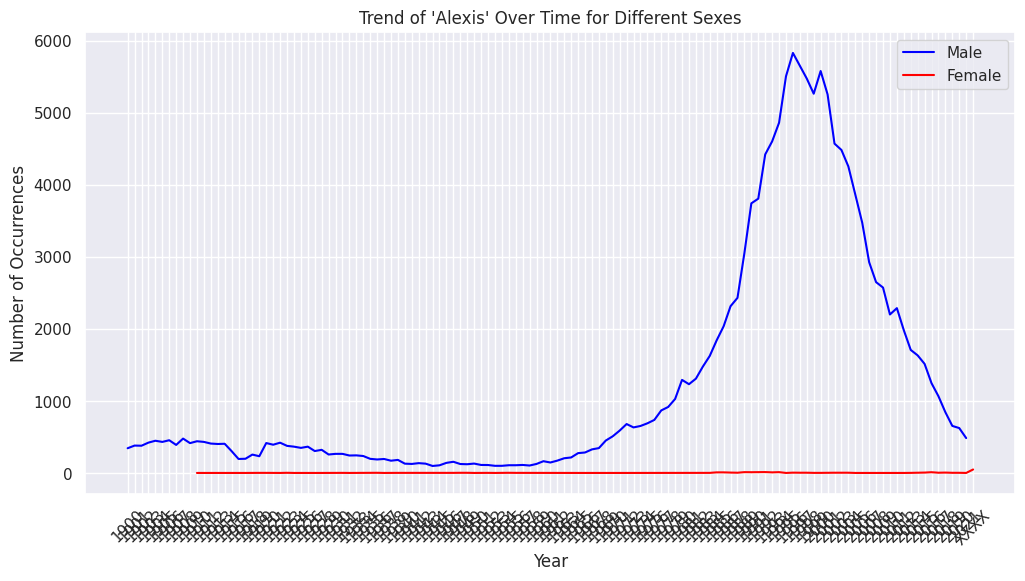

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for males ie sexe = 1
sns.lineplot(x="annais", y="nombre", data=alexis_by_year_sex[alexis_by_year_sex["sexe"] == 1],
             color="blue", label="Male", ax=ax)
# Plot for females ie sexe = 2
sns.lineplot(x="annais", y="nombre", data=alexis_by_year_sex[alexis_by_year_sex["sexe"] == 2],
             color="red", label="Female", ax=ax)

# Customize the plot
plt.title("Trend of 'Alexis' Over Time for Different Sexes")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend()
plt.xticks(rotation=45)

plt.show()

ZOOM sur la période où le prénom "Alexis" est donné aux femmes.

In [ ]:
# Filter data for "Alexis" and females ie sexe = 2
alexis_female_data = alexis_by_year_sex[(alexis_by_year_sex["sexe"] == 2) &
                                      (alexis_by_year_sex["nombre"] > 0)]

# Get the minimum and maximum years where Alexis was given to females
min_year = alexis_female_data["annais"].min()
max_year = alexis_female_data["annais"].max()


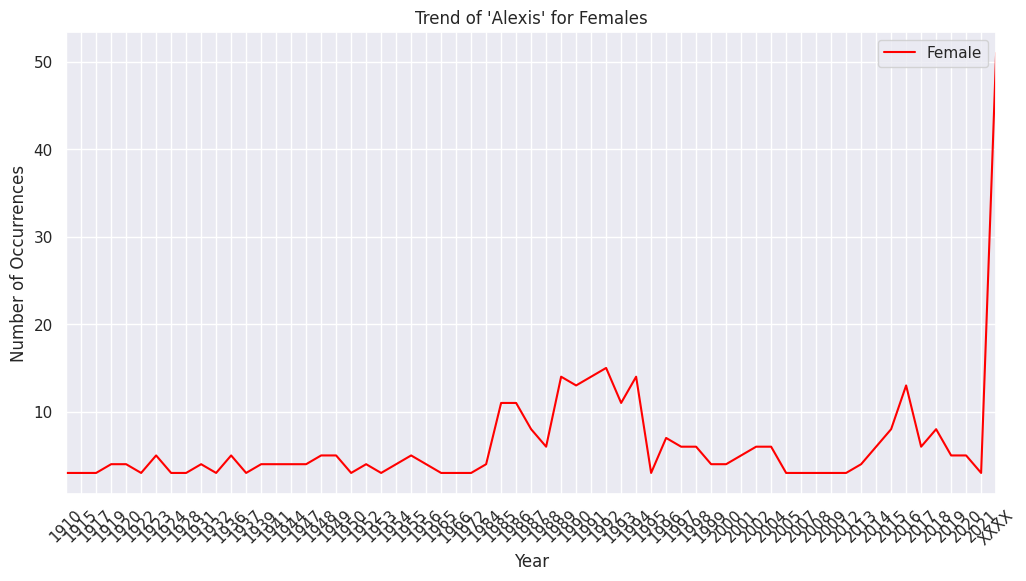

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x="annais", y="nombre", data=alexis_by_year_sex[alexis_by_year_sex["sexe"] == 2],
             color="red", label="Female", ax=ax)

# Set x-axis limits
ax.set_xlim(min_year, max_year)

# Customize the plot
plt.title("Trend of 'Alexis' for Females")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend()
plt.xticks(rotation=45)

plt.show()

On va maintenant chercher à observer l'évolution du ratio homme/femme pour le prénom "Alexis" au cours du temps.

In [ ]:
# Calculate the total occurrences for each year
total_by_year = alexis_data.groupby("annais")["nombre"].sum().reset_index()

# Merge with the data grouped by year and sex
alexis_by_year_sex = pd.merge(alexis_by_year_sex, total_by_year, on="annais", suffixes=("_sex", "_total"))

# Calculate the ratio of male/female occurrences
alexis_by_year_sex["ratio"] = alexis_by_year_sex["nombre_sex"] / alexis_by_year_sex["nombre_total"]


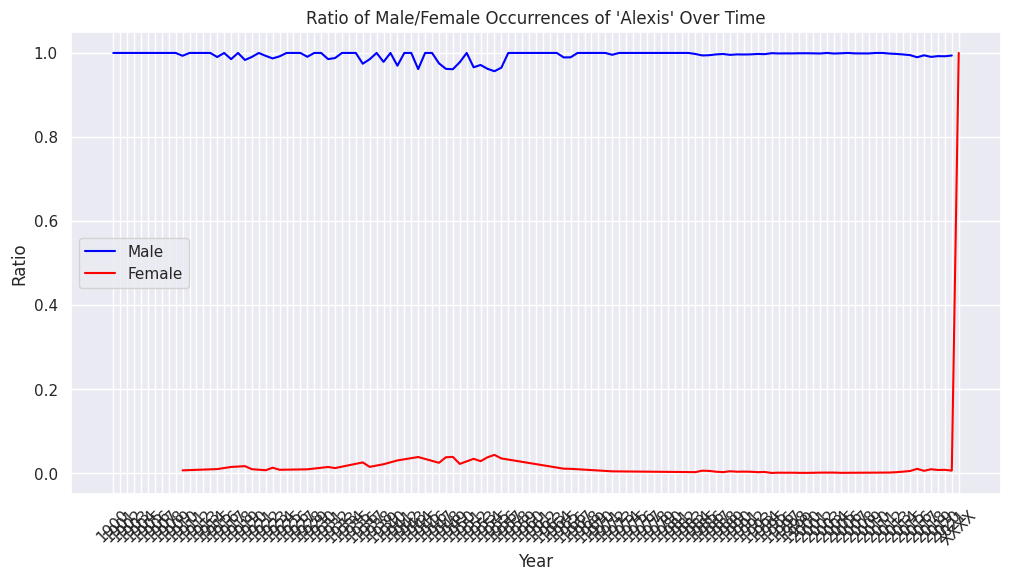

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the ratio for males ie sexe = 1
sns.lineplot(x="annais", y="ratio", data=alexis_by_year_sex[alexis_by_year_sex["sexe"] == 1],
             color="blue", label="Male", ax=ax)

# Plot the ratio for females ie sexe = 2
sns.lineplot(x="annais", y="ratio", data=alexis_by_year_sex[alexis_by_year_sex["sexe"] == 2],
             color="red", label="Female", ax=ax)

# Customize the plot
plt.title("Ratio of Male/Female Occurrences of 'Alexis' Over Time")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.xticks(rotation=45)

plt.show()

* Analyse 3 : Comparaison de l'évolution de la longueur du prénom avec l'évolution du prénom "Alexis" vers le prénom "Alex" pour les hommes uniquement


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.reset_orig()  # Reset in case previous cells were executed
sns.set()
color_palette = sns.color_palette()

prénom = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip",
                         compression='zip',
                         sep=";")

In [ ]:
#Select only male names ie sexe = 1
male_names = prénom[prénom["sexe"] == 1]

In [ ]:
#Calculate name length and create a category column
prénom['name_length'] = prénom['preusuel'].str.len()
prénom['name_length_category'] = pd.cut(prénom['name_length'], bins=[0, 4, float('inf')],
                                        labels=['1-4 letters', '>4 letters'])

#Group by name length category and year
name_length_by_year = prénom.groupby(['name_length_category', 'annais'])['nombre'].sum().reset_index()

<ipython-input-79-4d850e0bd7fd>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  name_length_by_year = prénom.groupby(['name_length_category', 'annais'])['nombre'].sum().reset_index()


In [ ]:
#Modify get_prénom_data function to accept the second argument
def get_prénom_data(df, prénom_name):  # Add df as an argument
    data = (df[(df["preusuel"] == prénom_name)]  # Use df for filtering
                   .drop(["preusuel", "sexe"], axis=1)
                   .sort_values(by=['annais']))
    data = data.groupby(data.annais).sum()
    data = data.reset_index()
    data['annais'] = pd.to_numeric(data['annais'], errors='coerce')
    return data

In [ ]:
#Get data for Alexis and Alex
data_alexis_male = get_prénom_data(male_names, "ALEXIS")
data_alex_male = get_prénom_data(male_names, "ALEX")


In [ ]:
# Create a 'category' column in the individual name DataFrames
data_alexis_male['category'] = 'Alexis (Male)'
data_alex_male['category'] = 'Alex (Male)'

# Check if 'name_length_category' column exists before converting to string
if 'name_length_category' in name_length_by_year.columns:
    name_length_by_year['name_length_category'] = name_length_by_year['name_length_category'].astype(str)

    # Rename the 'name_length_category' to 'category' to match the column names
    name_length_by_year.rename(columns={'name_length_category': 'category'}, inplace=True)

# Concatenate all DataFrames
all_data = pd.concat([name_length_by_year, data_alexis_male, data_alex_male], ignore_index=True)

TypeError: 'value' must be an instance of str or bytes, not a int

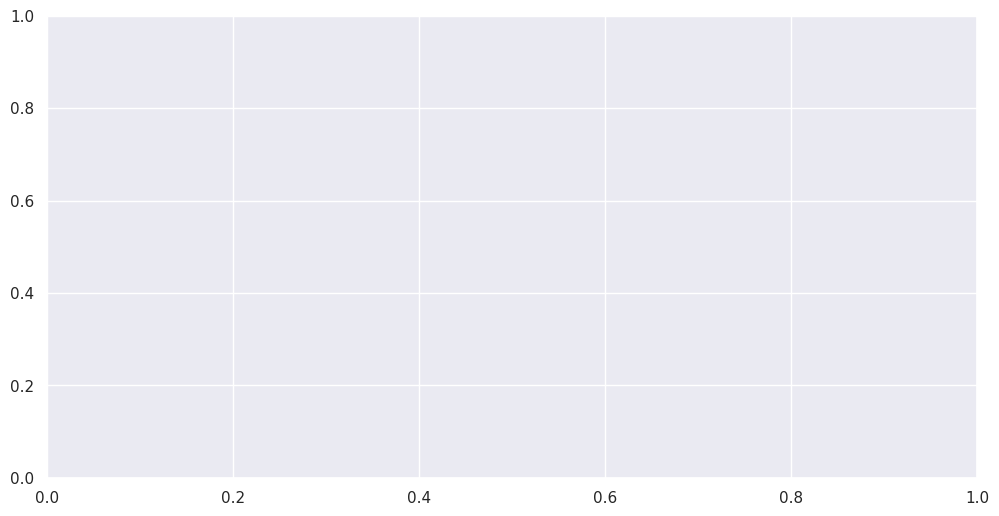

In [ ]:
#Create the plot
fig, ax = plt.subplots(figsize=(12, 6))


# Plot all data using hue for categories
sns.lineplot(x='annais', y='nombre', hue='category', style='category', data=all_data, ax=ax)


# Customize the plot
plt.title("Name Length, Popularity, and Trends of 'Alex' and 'Alexis' (male)")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.legend()

ax.set_yscale('log') #for better visibility

plt.show()


* Analyse 4 : Evolution des prénoms composés avec le prénoms "Alexis"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.reset_orig()  # Reset in case previous cells were executed
sns.set()
color_palette = sns.color_palette()

prénom = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip",
                         compression='zip',
                         sep=";")

In [ ]:
prénom = prénom.dropna(subset=['preusuel'])

# Find all names containing "Alexis" (case-insensitive)
names_with_alexis = prénom[prénom["preusuel"].str.contains("ALEXIS", case=False)]

#Get unique names
unique_names_with_alexis = names_with_alexis["preusuel"].unique()

#Create a DataFrame for the table
table_data = pd.DataFrame({'Names with "Alexis"': unique_names_with_alexis})

#Display the table
print(table_data)


  Names with "Alexis"
0              ALEXIS
1      CHARLES-ALEXIS
2     FRANÇOIS-ALEXIS
3         JEAN-ALEXIS
4        LOUIS-ALEXIS
5         MARC-ALEXIS
6         PAUL-ALEXIS
7       PIERRE-ALEXIS


In [ ]:
# Find all names containing "Alexis" (case-insensitive)
names_with_alexis = prénom[prénom["preusuel"].str.contains("ALEXIS", case=False)]

# Group by year and sum the occurrences of names with "Alexis"
data_names_with_alexis = names_with_alexis.groupby("annais")["nombre"].sum().reset_index()


In [ ]:
def get_prénom_data(prénom_name):
    # Filter the DataFrame
    data = (prénom[(prénom["preusuel"] == prénom_name)]
                   .drop(["preusuel", "sexe"], axis=1)
                   .sort_values(by=['annais']))
    # Convert the 'nombre' column to numeric before grouping
    data['nombre'] = pd.to_numeric(data['nombre'], errors='coerce')
    # Group by year and calculate the sum, now that the column is numeric
    data = data.groupby(data.annais).sum()
    data = data.reset_index()
    data['annais'] = pd.to_numeric(data['annais'], errors='coerce')
    return data

# Get data for Alexis
data_alexis = get_prénom_data("ALEXIS")


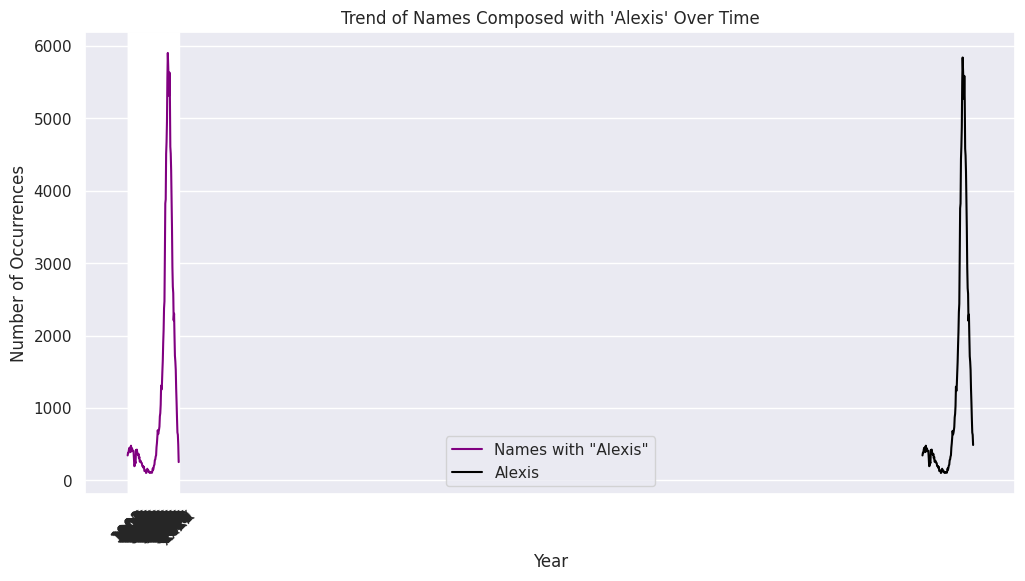

In [ ]:
#Create the plot
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the trend of names containing "Alexis"
sns.lineplot(x='annais', y='nombre', data=data_names_with_alexis,
             color='purple', label='Names with "Alexis"', ax=ax)

# Plot Alexis
sns.lineplot(x='annais', y='nombre', data=data_alexis,
             color='black', label='Alexis', ax=ax)


# Customize the plot
plt.title("Trend of Names Composed with 'Alexis' Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.legend()

plt.show()